<a href="https://colab.research.google.com/github/WilliamPurcell/CMinusCompiler/blob/main/Dog_and_Cat_Image_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
try:
  # This command only in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [50]:
# Get project files
!wget https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip

!unzip cats_and_dogs.zip

PATH = 'cats_and_dogs'

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')

# Get number of files in each directory. The train and validation directories
# each have the subdirecories "dogs" and "cats".
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))

# Variables for pre-processing and training.
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [51]:
# 3
train_image_generator = ImageDataGenerator(rescale=1/255)
validation_image_generator = ImageDataGenerator(rescale=1/255)
test_image_generator = ImageDataGenerator(rescale=1/255)

train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=validation_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=validation_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')
test_data_gen = test_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=PATH, classes=['test'],
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary', shuffle=False)

Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 50 images belonging to 1 classes.


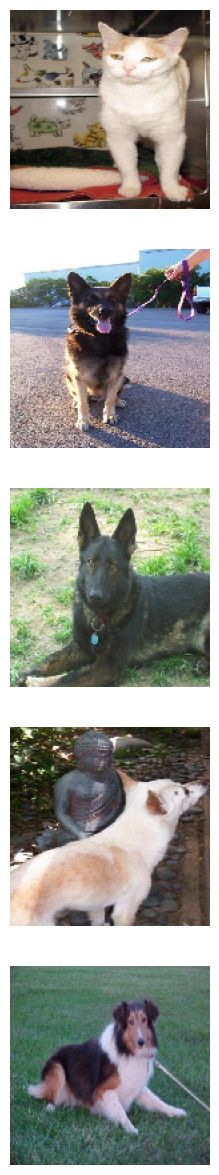

In [52]:
# 4
def plotImages(images_arr, probabilities = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
      for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, probability, ax in zip( images_arr, probabilities, axes):
          ax.imshow(img)
          ax.axis('off')
          if probability > 0.5:
              ax.set_title("%.2f" % (probability*100) + "% dog")
          else:
              ax.set_title("%.2f" % ((1-probability)*100) + "% cat")
    plt.show()

sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:5])


In [53]:
# 5
# Define transformations
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,      # Rotation range (0-180 degrees)
    width_shift_range=0.2,  # Shifts the image horizontally (fraction of total width)
    height_shift_range=0.2, # Shifts the image vertically (fraction of total height)
    shear_range=0.2,        # Shear intensity (shear angle in counter-clockwise direction in radians)
    zoom_range=0.2,         # Range for random zoom
    horizontal_flip=True,   # Randomly flip inputs horizontally
    fill_mode='nearest'     # Strategy for filling in newly created pixels, 'nearest' fills with the nearest pixel
)

# Define train generator
train_generator = train_datagen.flow_from_directory(
    train_dir,                # Directory with the training images
    target_size=(150, 150),   # Resizes all images to 150x150
    batch_size=20,            # Size of the batches of data (default is 32)
    class_mode='binary'       # Since we use binary_crossentropy loss, we need binary labels
)

augmented_images, _ = next(train_generator)



Found 2000 images belonging to 2 classes.


"\n# Determine the number of rows and columns for subplots\nnum_images = len(augmented_images)\nnum_rows = math.ceil(num_images / 3)\nnum_cols = min(num_images, 3)\n\n# Plot the images along with their rotations\nplt.figure(figsize=(10, 10))\nfor i in range(num_images):\n    plt.subplot(num_rows, num_cols, i + 1)\n    plt.imshow(augmented_images[i])\n    plt.axis('off')\nplt.show()\n"

Found 2000 images belonging to 2 classes.


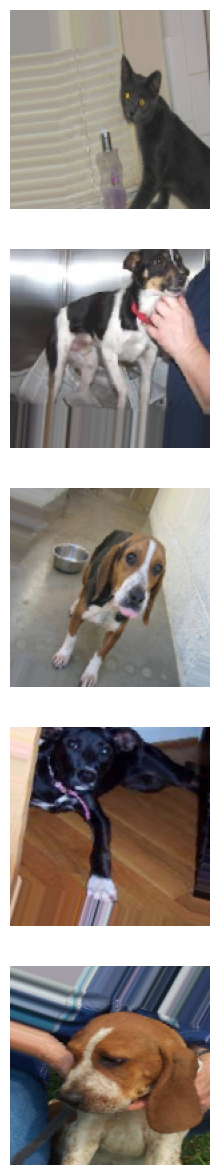

"\ntrain_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,\n                                                     directory=train_dir,\n                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),\n                                                     class_mode='binary')\n\naugmented_images = [train_data_gen[0][0][0] for i in range(5)]\n\nplotImages(augmented_images)"

In [54]:
# 6
train_data_gen = train_datagen.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

augmented_images = [train_data_gen[0][0][i] for i in range(5)]

plotImages(augmented_images)


In [44]:
#7
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # For binary classification, use a sigmoid activation
model.compile(optimizer='adam', metrics=['accuracy'], loss='binary_crossentropy')
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_21 (MaxPooli  (None, 74, 74, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_22 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_22 (MaxPooli  (None, 36, 36, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_23 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_23 (MaxPooli  (None, 17, 17, 128)      

In [55]:
# 8
history = model.fit(train_data_gen, steps_per_epoch=total_train//batch_size, epochs=epochs,
                    validation_data=val_data_gen, validation_steps=total_val//batch_size, verbose=1)

Epoch 1/15
15/15 [==============================] - 131s 9s/step - loss: 0.6268 - accuracy: 0.6517 - val_loss: 0.6033 - val_accuracy: 0.6529
Epoch 2/15
15/15 [==============================] - 130s 9s/step - loss: 0.6026 - accuracy: 0.6688 - val_loss: 0.6013 - val_accuracy: 0.6730
Epoch 3/15
15/15 [==============================] - 134s 9s/step - loss: 0.6220 - accuracy: 0.6597 - val_loss: 0.6476 - val_accuracy: 0.6283
Epoch 4/15
15/15 [==============================] - 134s 9s/step - loss: 0.5918 - accuracy: 0.6822 - val_loss: 0.5788 - val_accuracy: 0.6886
Epoch 5/15
15/15 [==============================] - 131s 9s/step - loss: 0.5977 - accuracy: 0.6816 - val_loss: 0.5715 - val_accuracy: 0.6953
Epoch 6/15
15/15 [==============================] - 127s 8s/step - loss: 0.5723 - accuracy: 0.6896 - val_loss: 0.5679 - val_accuracy: 0.6987
Epoch 7/15
15/15 [==============================] - 132s 9s/step - loss: 0.5783 - accuracy: 0.6950 - val_loss: 0.6094 - val_accuracy: 0.6551
Epoch 8/15
15

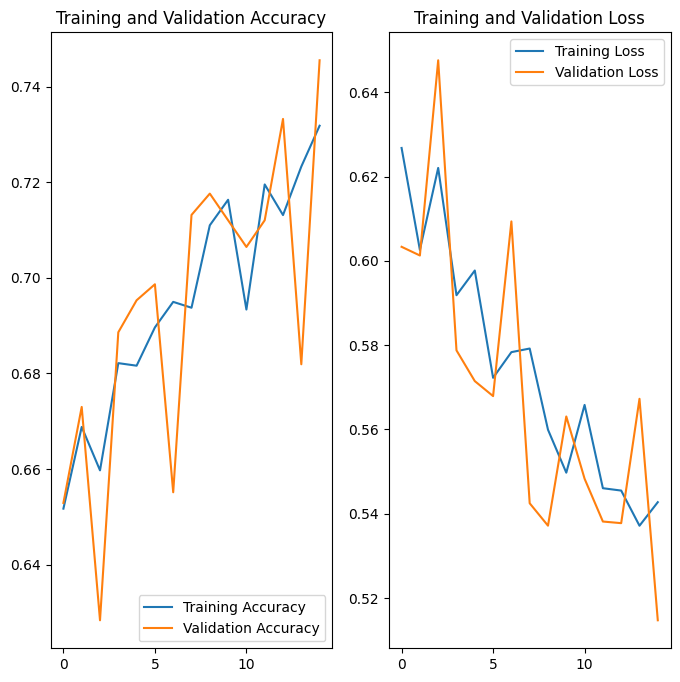

In [56]:
# 9
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

2/2 [==============================] - 1s 215ms/step


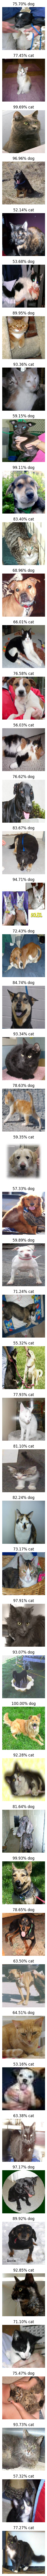

In [65]:
# Get a batch of test images and their labels from test_data_gen
test_images, _ = next(test_data_gen)

# Predict probabilities for the test images using the trained model
probabilities = model.predict(test_images)

# Plot the test images along with their predicted probabilities
plotImages(test_images, probabilities=probabilities[:, 0])


In [64]:
#11
answers =  [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
            1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
            1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
            1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
            0, 0, 0, 0, 0, 0]

correct = 0

for probability, answer in zip(probabilities, answers):
    if round(probability[0]) == answer:  # Round the probability to the nearest integer
        correct += 1

percentage_identified = (correct / len(answers)) * 100

passed_challenge = percentage_identified >= 63

print(f"Your model correctly identified {round(percentage_identified, 2)}% of the images of cats and dogs.")

if passed_challenge:
    print("You passed the challenge!")
else:
    print("You haven't passed yet. Your model should identify at least 63% of the images. Keep trying. You will get it!")


Your model correctly identified 74.0% of the images of cats and dogs.
You passed the challenge!
